In [14]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter
from src.run import run_iaf

In [16]:
# Run simulation
ap_dep_idx = 3 # 3 means 1.0 D/P ratio in apical dendrites
num_state_idx = 0 # 0 means 3 independent components
basal_follow = 0 # 0 means basal dendrites have 1.1 D/P ratio

T = 1000
iaf, spk_times, small_basal_weight, small_apical_weight, profiler = run_iaf(ap_dep_idx, num_state_idx, basal_follow, T=T)

# Create spike train and PSTH
spikes = np.zeros(iaf.T * 1000)
spikes[spk_times] = 1
psth_window = 1  # in seconds
dpsth = round(psth_window/iaf.dt)
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(iaf.dt, iaf.T*iaf.dt + iaf.dt, iaf.dt)

100%|██████████| 1000/1000 [03:06<00:00,  5.36it/s]


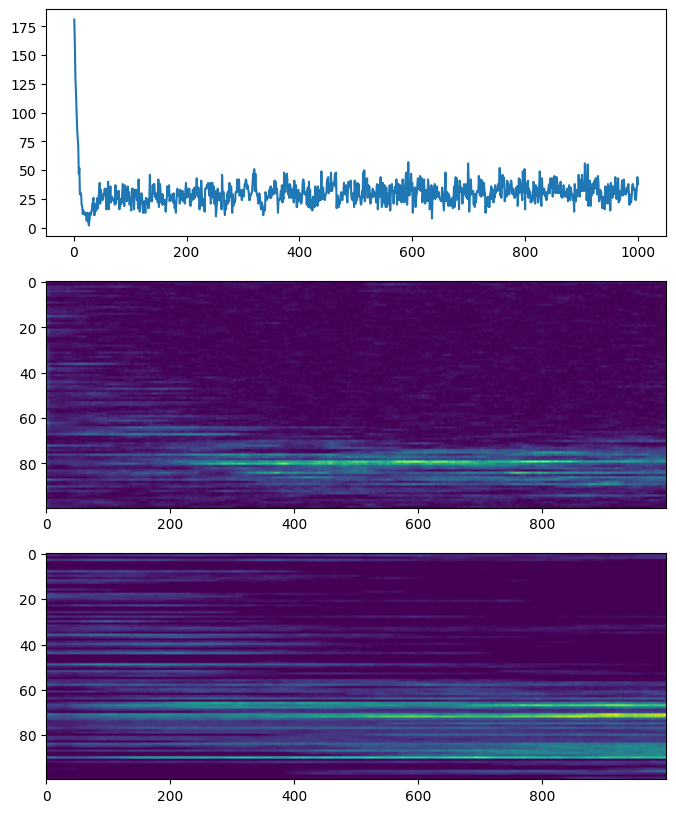

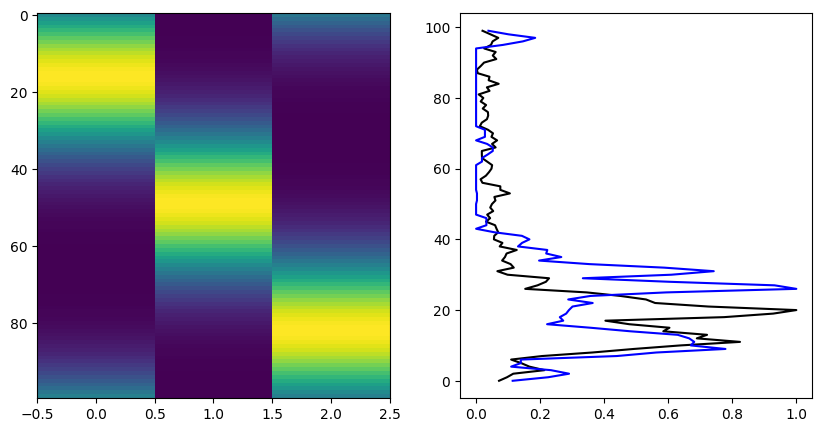

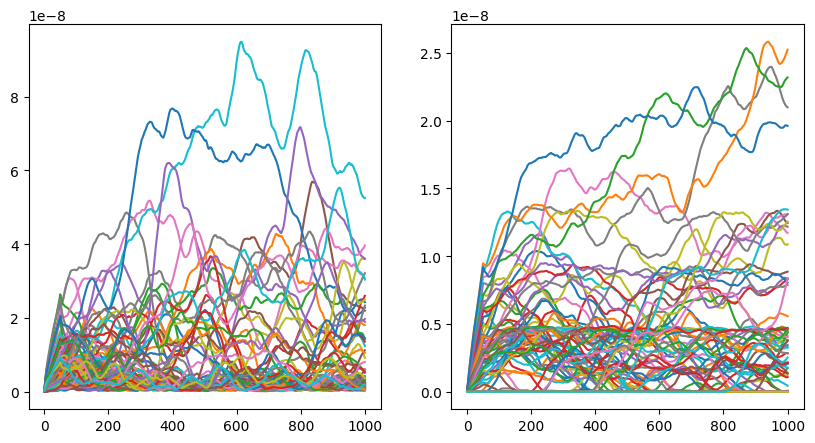

In [18]:
# Create plots
plt.figure(1, figsize=(8, 10))
plt.subplot(3, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(3, 1, 2)
plt.imshow(small_basal_weight, aspect='auto')
plt.subplot(3, 1, 3)
plt.imshow(small_apical_weight, aspect='auto')

plt.figure(2, figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(iaf.sourceLoading.T, aspect='auto')
plt.subplot(1, 2, 2)
smooth_factor = round(iaf.numInputs/iaf.numSignals/10)
kernel = np.ones(smooth_factor)
sbw = lfilter(kernel, 1, small_basal_weight[:, -1])
saw = lfilter(kernel, 1, small_apical_weight[:, -1])
plt.plot(sbw/np.max(sbw), range(iaf.numInputs-1, -1, -1), 'k', linewidth=1.5)
plt.plot(saw/np.max(saw), range(iaf.numInputs-1, -1, -1), 'b', linewidth=1.5)

plt.figure(3, figsize=(10, 5))
sm_trajectory = 50
kernel_traj = np.ones(sm_trajectory)
plt.subplot(1, 2, 1)
plt.plot(range(1, small_basal_weight.shape[1] + 1), 
         lfilter(kernel_traj, 1, small_basal_weight, axis=1).T)
plt.subplot(1, 2, 2)
plt.plot(range(1, small_apical_weight.shape[1] + 1), 
         lfilter(kernel_traj, 1, small_apical_weight, axis=1).T)

plt.show()